In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv")

In [2]:
data["transactiondate"] = pd.to_datetime(data["transactiondate"])
data["year_month"] = data["transactiondate"].dt.to_period('M')
data["year_month"] = data["year_month"].astype(str)
data["year_month"] = sorted(data["year_month"])

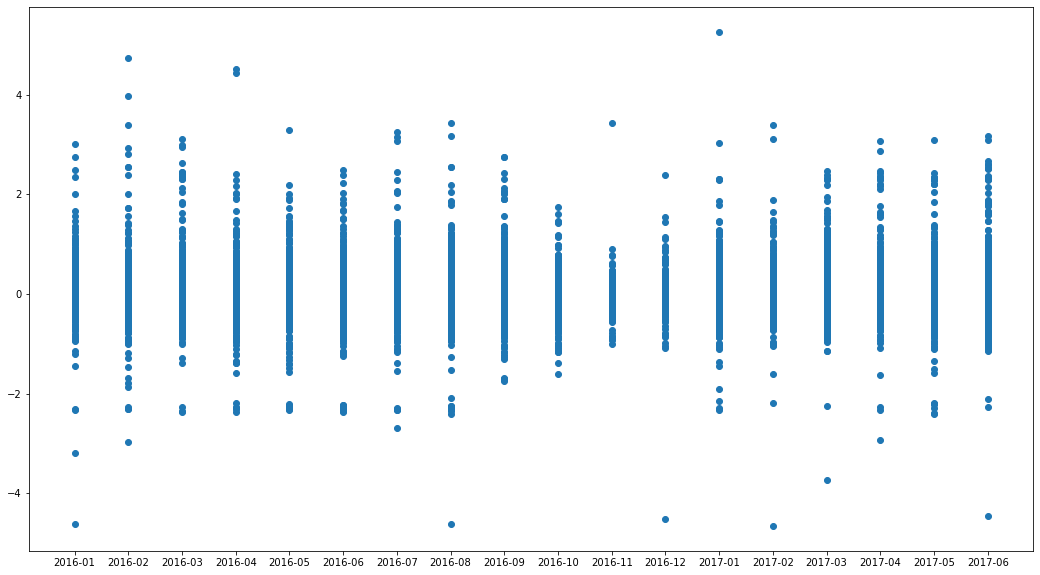

In [3]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.plot_date(data["year_month"], data['logerror'])

In [4]:
data["transactiondate"] = pd.to_datetime(data["transactiondate"])

In [5]:
k= data[['transactiondate', 'logerror']]

data["transactiondate"] = sorted(data["transactiondate"])
median = k.resample("M", on='transactiondate').median()

In [6]:
median.head()

,logerror
transactiondate,
2016-01-31,0.009
2016-02-29,0.008
2016-03-31,0.001
2016-04-30,0.003
2016-05-31,0.003


In [7]:
median = median.reset_index()

In [8]:
import plotly.express as px
fig1= px.line(median, x="transactiondate", y="logerror", title='Error by Date')
fig1.show()